In [3]:
# Define task

from _collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np

import sys
import os

from scipy.ndimage import gaussian_filter
from sklearn.preprocessing import normalize
import seaborn as sns
import warnings


In [170]:
num_states = 36
arena_len = 6
feature_dim = 25
feature_vals = np.array([0, 0.25, 0.5, 0.75, 1.])

# 2D

In [135]:
features = np.random.choice([0,1.], size=(num_states, feature_dim))

In [136]:
sigma = [2, 0]
blurred_features = gaussian_filter(features, sigma=sigma)

In [137]:
blurred_features -= np.min(blurred_features, axis=1)[:,None]

In [138]:
blurred_features = normalize(
    blurred_features.reshape(num_states, feature_dim), axis=1, norm='max'
    )

In [139]:
midpoints = (feature_vals[1:]+feature_vals[:-1])/2
np.digitize(blurred_features, midpoints).shape

(36, 30)

In [140]:
feature_vals[np.digitize(blurred_features, midpoints)].shape

(36, 30)

In [141]:
x = feature_vals[np.digitize(blurred_features, midpoints)]

In [142]:
for val in feature_vals:
    print(np.sum(x == val))

94
250
336
290
110


# Sparse

In [192]:
features = np.eye(num_states)
f = interpolate.interp1d(np.arange(num_states), features, 'linear', axis=1)
features = np.apply_along_axis(f, 0, np.linspace(0, num_states-1, num=feature_dim))

In [189]:
from scipy import interpolate

x = y = np.arange(arena_len)
new_x = new_y = np.linspace(
    0, arena_len-1, num=int(np.sqrt(feature_dim))
    )
features = []
for state in range(num_states):
    feature = np.zeros(num_states)
    feature[state] = 1.
    feature = feature.reshape((arena_len, arena_len))
    f = interpolate.interp2d(x, y, feature, kind='linear')
    feature = f(new_x, new_y)
    features.append(feature.flatten())
features = np.array(features).reshape((arena_len, arena_len, -1))

In [190]:
features.shape

(6, 6, 25)

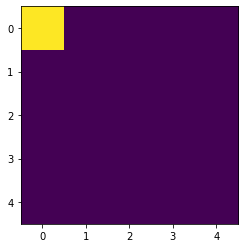

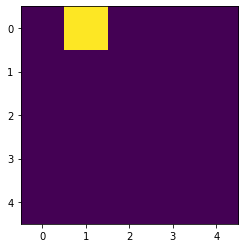

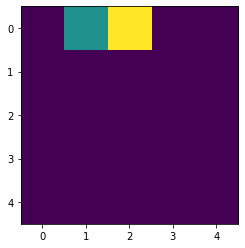

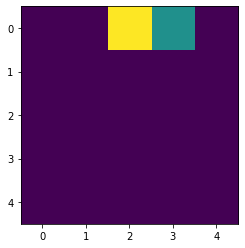

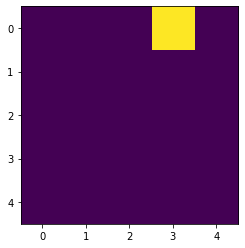

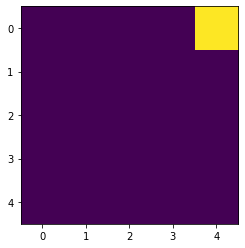

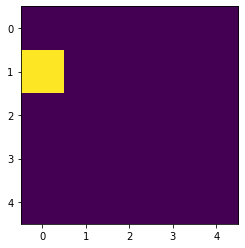

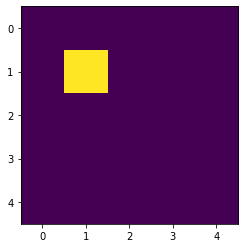

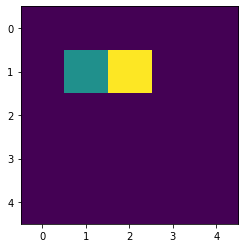

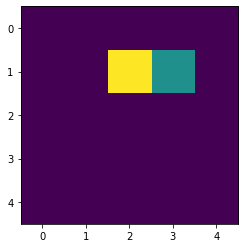

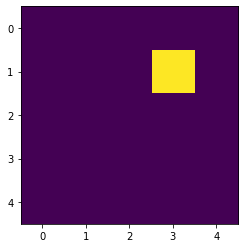

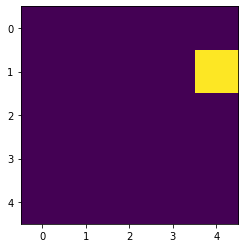

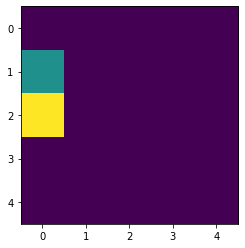

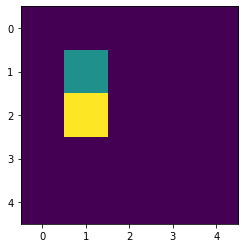

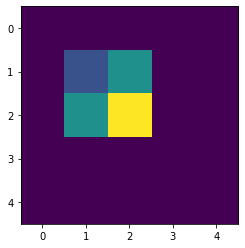

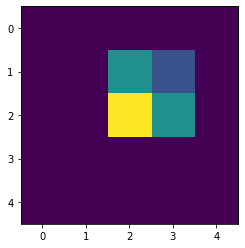

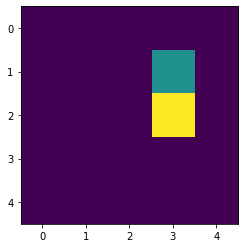

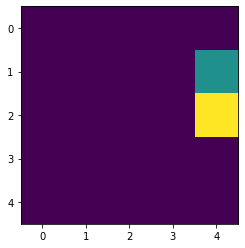

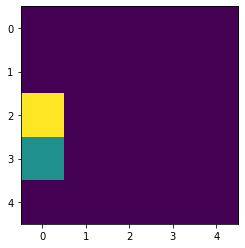

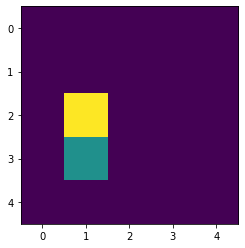

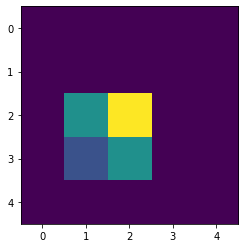

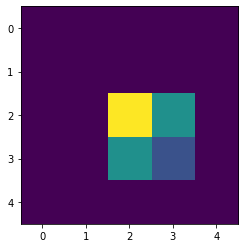

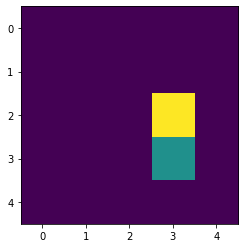

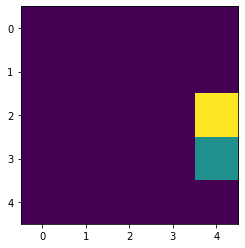

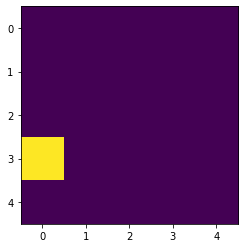

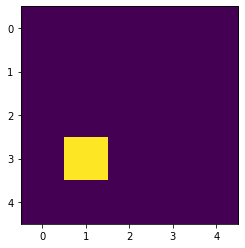

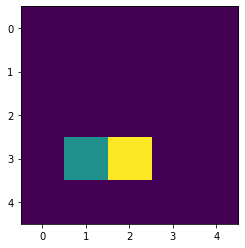

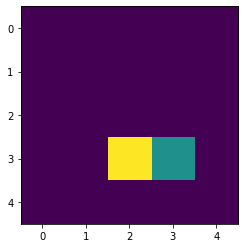

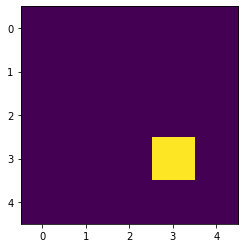

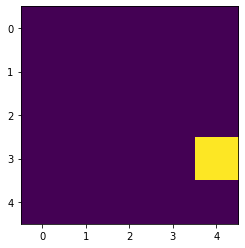

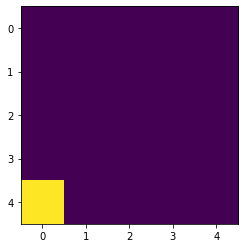

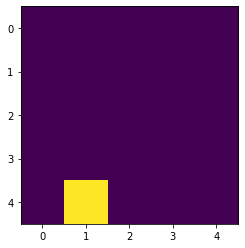

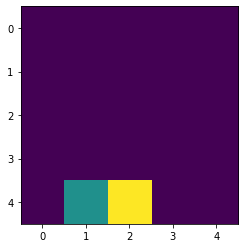

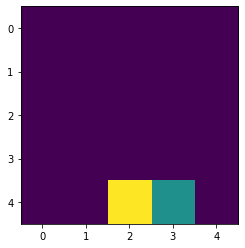

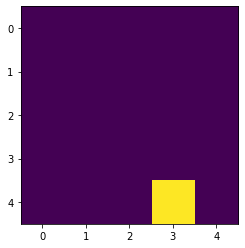

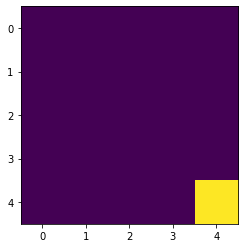

In [185]:
for f in features:
    plt.figure()
    plt.imshow(f)
    plt.show()

In [158]:
x = np.arange(arena_len)
y = np.arange(arena_len)


f = interpolate.interp2d(x, y, features[0,0], kind='linear')

In [148]:
xnew = np.arange(-5.01, 5.01, 1e-1)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)

In [160]:
new_x = np.linspace(0, num_states-1, num=feature_dim)
f(new_x, new_x).shape

(30, 30)

In [149]:
xnew.shape

(101,)